In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, QuantileTransformer, Normalizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.linear_model import LinearRegression, LogisticRegression, PoissonRegressor
from sklearn.tree import DecisionTreeRegressor

import graphviz
from sklearn.tree import export_graphviz
from IPython.display import Image

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from analysis import get_feature_importances, visualize_decision_trees, get_vif, wl_accuracy, season_record, runs_per_game

In [2]:
version = 6
df = pd.read_csv(f'./data/baseball/training/game_data_v{version}.csv')

In [3]:
# create the appropriate training and testing data based on home/away, dropping columns as needed
def create_data(drop_cols=['away_score', 'home_score', 'away_team', 'home_team'], y_col='away_score', split_by='random'):
    y = df[y_col]
    x = df.drop(drop_cols, axis=1)

    if split_by == 'season':
        x_train, x_test = x.iloc[0:13047], x.iloc[13047:]
        y_train, y_test = y.iloc[0:13047], y.iloc[13047:]
    else:
        x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle=True)
    
    return x_train, x_test, y_train, y_test

In [4]:
x_train_away, x_test_away, y_train_away, y_test_away = create_data(y_col='away_score', split_by='season')
x_train_home, x_test_home, y_train_home, y_test_home = create_data(y_col='home_score', split_by='season')

In [5]:
def generate_random_results():
    results = {'away_pred': [], 'home_pred': [], 'away_true': y_test_away, 'home_true': y_test_home}
    
    for i in range(len(y_test_away)):
        results['away_pred'].append(random.randint(0, 1))
        results['home_pred'].append(1 - results['away_pred'][i])
    
    return pd.DataFrame(results)

In [9]:
results = generate_random_results()

print('RANDOM GUESSING MODEL')
print(f'Accuracy: {wl_accuracy(results)}%')
print('-' * 30)
season_record(df, results)

RANDOM GUESSING MODEL
Accuracy: 49.25925925925926%
------------------------------
Season records:
LAA: 94-68	CHC: 92-70	NYM: 90-72	SF: 90-72	SEA: 89-73	
LAD: 88-74	CWS: 85-77	CIN: 84-78	TOR: 84-78	WSH: 84-78	
BOS: 84-78	PHI: 84-78	TEX: 84-78	SD: 83-79	DET: 83-79	
TB: 82-80	MIL: 79-83	COL: 79-83	KC: 79-83	OAK: 79-83	
PIT: 78-84	CLE: 78-84	MIN: 77-85	STL: 76-86	ATL: 75-87	
NYY: 74-88	BAL: 71-91	MIA: 70-92	AZ: 68-94	HOU: 67-95	


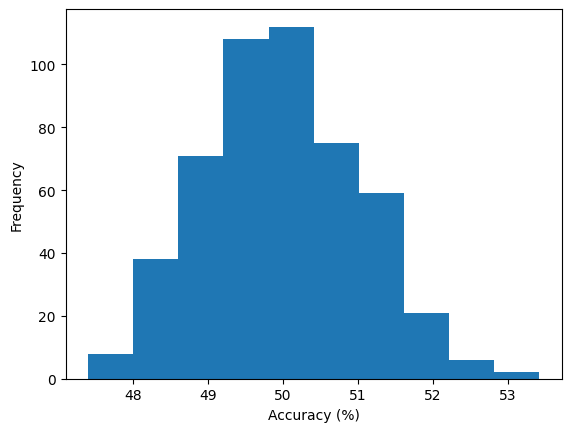

                0
count  500.000000
mean    49.999177
std      1.017600
min     47.407407
25%     49.259259
50%     49.979424
75%     50.699588
max     53.415638


In [7]:
acc = []

for i in range(500):
    results = generate_random_results()
    acc.append(wl_accuracy(results))

plt.hist(acc)

plt.xlabel('Accuracy (%)')
plt.ylabel('Frequency')

plt.show()

print(pd.DataFrame(acc).describe())